In [2]:
!pip install pyspark

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Fire DF').getOrCreate()

In [4]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df=spark.read.csv('drive/My Drive/Colab Notebooks/fire.csv',header=True,inferSchema=True)

In [6]:
df.show()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+

In [7]:
df=df.withColumn('Date',to_date(col('callDate'),'dd/mm/yyyy')).drop('callDate')

In [8]:
clean_df=df.withColumn('Year',year(col('Date'))).withColumn('Month',month(col('Date'))).withColumn('Week',weekofyear(col('Date')))
clean_df.show()

+----------+------+--------------+----------------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+----------+----+-----+----+
|CallNumber|UnitID|IncidentNumber|        CallType| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|      Date|Year|Month|Week|
+----------+------+--------------+----------------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+-----

In [9]:
df.count()

175296

In [10]:
 #Get yearly count of fire calls
clean_df.select('Year').groupBy('Year').count().orderBy('Year',ascending=True).show()

+----+-----+
|Year|count|
+----+-----+
|2000| 5459|
|2001| 7713|
|2002| 8090|
|2003| 8499|
|2004| 8283|
|2005| 8282|
|2006| 8174|
|2007| 8255|
|2008| 8869|
|2009| 8789|
|2010| 9341|
|2011| 9735|
|2012| 9674|
|2013|10020|
|2014|10775|
|2015|11458|
|2016|11609|
|2017|12135|
|2018|10136|
+----+-----+



In [11]:
#What were all the different types of fire calls in 2018?
clean_df.select('callType').where(col('Year')=='2018').distinct().show(truncate=False)

+-------------------------------+
|callType                       |
+-------------------------------+
|Elevator / Escalator Rescue    |
|Alarms                         |
|Odor (Strange / Unknown)       |
|Citizen Assist / Service Call  |
|HazMat                         |
|Vehicle Fire                   |
|Other                          |
|Outside Fire                   |
|Traffic Collision              |
|Assist Police                  |
|Gas Leak (Natural and LP Gases)|
|Water Rescue                   |
|Electrical Hazard              |
|Structure Fire                 |
|Medical Incident               |
|Fuel Spill                     |
|Smoke Investigation (Outside)  |
|Train / Rail Incident          |
|Explosion                      |
|Suspicious Package             |
+-------------------------------+



In [15]:
#Which week in the year in 2018 had the most fire calls?
fire_calls_2018 = clean_df.filter(col('Year') == 2018)
max_week = fire_calls_2018.groupBy('Week').count()
max_count = max_week.agg({'count': 'max'}).collect()[0][0]
result = max_week.filter(col('count') == max_count).select('Week')
result.show()


+----+
|Week|
+----+
|   1|
+----+



In [18]:
#Get monthly count of fire calls based on year
clean_df.groupBy('Year','Month').count().show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2018|    1|10136|
|2008|    1| 8869|
|2009|    1| 8789|
|2003|    1| 8499|
|2014|    1|10775|
|2005|    1| 8282|
|2016|    1|11609|
|2012|    1| 9674|
|2006|    1| 8174|
|2002|    1| 8090|
|2013|    1|10020|
|2015|    1|11458|
|2011|    1| 9735|
|2010|    1| 9341|
|2017|    1|12135|
|2001|    1| 7713|
|2007|    1| 8255|
|2000|    1| 5459|
|2004|    1| 8283|
+----+-----+-----+



In [19]:
#Give monthly report of fire call types for selected year
selected_year = 2018
filtered_data = clean_df.filter(col('Year') == selected_year)
monthly_report = filtered_data.groupBy('Month', 'CallType').count()
monthly_report.show()

+-----+--------------------+-----+
|Month|            CallType|count|
+-----+--------------------+-----+
|    1|               Other|  114|
|    1|Train / Rail Inci...|    5|
|    1|        Vehicle Fire|   28|
|    1|Odor (Strange / U...|   10|
|    1|              HazMat|    5|
|    1|      Structure Fire|  906|
|    1|          Fuel Spill|   10|
|    1|Citizen Assist / ...|  113|
|    1|   Traffic Collision|  433|
|    1|   Electrical Hazard|   30|
|    1|Elevator / Escala...|   36|
|    1|        Water Rescue|   43|
|    1|        Outside Fire|  153|
|    1|    Medical Incident| 7004|
|    1|Gas Leak (Natural...|   69|
|    1|              Alarms| 1144|
|    1|Smoke Investigati...|   28|
|    1|       Assist Police|    1|
|    1|           Explosion|    1|
|    1|  Suspicious Package|    3|
+-----+--------------------+-----+



In [9]:
#consider month and if particular month then estimate the season
#UDF->user defined function to register all the method calls
def mapSeason(data):
  if 2 < data < 6:
    return 'Spring'
  elif 5 < data <9:
    return 'Summer'
  elif 8 < data < 12:
    return 'Autumn'
  else:
    return 'Winter'
seasonUDF=udf(mapSeason,StringType())
clean_df=clean_df.withColumn('Season',seasonUDF(col('Month')))
clean_df.show()

+----------+------+--------------+----------------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+----------+----+-----+----+------+
|CallNumber|UnitID|IncidentNumber|        CallType| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|      Date|Year|Month|Week|Season|
+----------+------+--------------+----------------+----------+--------------------+--------------------+--------------------+----+-------+---------+--------

In [16]:
#Give top five fire call types for every season of selected year (seasons are like Spring, summer, fall, winter etc)
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
filtered_data = clean_df.filter(col('Year') == 2018)
window_spec = Window.partitionBy('Season').orderBy(col('count').desc())
ranked_data = filtered_data.groupBy('Season', 'CallType').count().withColumn("rank", rank().over(window_spec))
top_five_in_each_season = ranked_data.filter(col('rank') <= 5)
top_five_in_each_season.show()

+------+-----------------+-----+----+
|Season|         CallType|count|rank|
+------+-----------------+-----+----+
|Winter| Medical Incident| 7004|   1|
|Winter|           Alarms| 1144|   2|
|Winter|   Structure Fire|  906|   3|
|Winter|Traffic Collision|  433|   4|
|Winter|     Outside Fire|  153|   5|
+------+-----------------+-----+----+



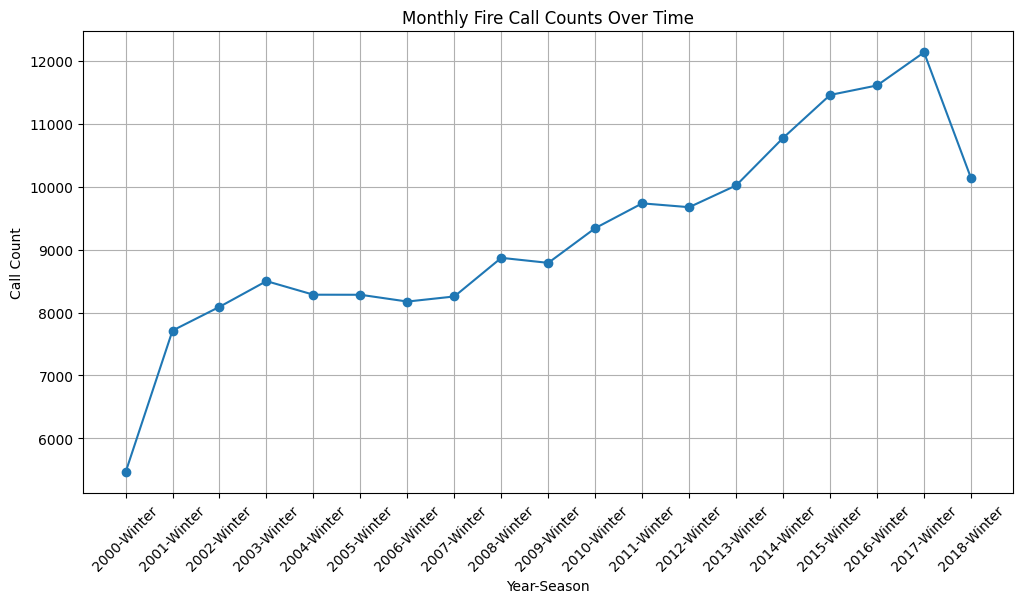

In [19]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
#Whether fire type calls are seasonal?

monthly_call_counts = clean_df.groupBy('Year', 'Season').count().orderBy('Year', 'Season')
monthly_call_counts_pd = monthly_call_counts.toPandas()
plt.figure(figsize=(12, 6))
plt.plot(monthly_call_counts_pd['Year'].astype(str) + '-' + monthly_call_counts_pd['Season'].astype(str), monthly_call_counts_pd['count'], marker='o')
plt.title('Monthly Fire Call Counts Over Time')
plt.xlabel('Year-Season')
plt.ylabel('Call Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [18]:
#What months within the year 2018 saw the highest number of fire calls
filtered_data = clean_df.filter(col('Year') == 2018)
monthly_call_counts = filtered_data.groupBy('Month').count()
max_calls = monthly_call_counts.agg({"count": "max"}).collect()[0][0]
top_months = monthly_call_counts.filter(col("count") == max_calls)
top_months.show()

+-----+-----+
|Month|count|
+-----+-----+
|    1|10136|
+-----+-----+



In [1]:
#Find which type of fire call is major calltype in each year
yearly_call_counts = clean_df.groupBy('Year', 'CallType').count()
major_call_type_by_year = yearly_call_counts.groupBy('Year').agg(max('count').alias('MaxCount'))
major_call_type_details = yearly_call_counts.join(
    major_call_type_by_year,
    (yearly_call_counts['Year'] == major_call_type_by_year['Year']) & (yearly_call_counts['count'] == major_call_type_by_year['MaxCount']),
    'inner'
)
result = major_call_type_details.select(col('Year'), 'CallType', 'MaxCount')
result.show()

NameError: ignored

In [24]:
#Find out average delay in response for each call type
average_delay_by_call_type = clean_df.groupBy('CallType').agg(avg('Delay').alias('AverageDelay'))
average_delay_by_call_type.show()

+--------------------+------------------+
|            CallType|      AverageDelay|
+--------------------+------------------+
|Elevator / Escala...| 4.337821933487857|
|         Marine Fire| 6.928571314285715|
|  Aircraft Emergency|3.7731481500000004|
|Confined Space / ...| 6.915384576923078|
|      Administrative|12.261111333333332|
|              Alarms|3.5427290545084076|
|Odor (Strange / U...| 4.947959182000003|
|Citizen Assist / ...| 5.473342576604596|
|              HazMat| 7.527016126612902|
|Watercraft in Dis...| 6.886904817857142|
|           Explosion| 4.110674168539326|
|           Oil Spill| 4.977777761904762|
|        Vehicle Fire|3.9039227134074928|
|  Suspicious Package|6.5766667199999995|
|Extrication / Ent...| 4.391666678571427|
|               Other| 5.505155432421978|
|        Outside Fire| 4.181948425367714|
|   Traffic Collision| 3.789132088873234|
|       Assist Police|26.981903994285716|
|Gas Leak (Natural...|  4.58339877840314|
+--------------------+------------

In [26]:
#Find which calltype has maximum average delay time.
average_delay_by_call_type = clean_df.groupBy('CallType').agg(avg('Delay').alias('AverageDelay'))
max_average_delay_call_type = average_delay_by_call_type.orderBy(col('AverageDelay').desc()).first()
print("Call Type with Maximum Average Delay:")
print("Call Type:", max_average_delay_call_type['CallType'])
print("Average Delay:", max_average_delay_call_type['AverageDelay'])

Call Type with Maximum Average Delay:
Call Type: Mutual Aid / Assist Outside Agency
Average Delay: 38.41666631111111


In [28]:
#Which neighborhood in San Francisco generated the most fire calls in 2018
neighborhood_call_counts = clean_df.filter((col('Year') == 2018) & (col('Neighborhood').isNotNull())) \
    .groupBy('Neighborhood').count()
max_calls_neighborhood = neighborhood_call_counts.orderBy(col('count').desc()).first()
print("Neighborhood:", max_calls_neighborhood['Neighborhood'])
print("Number of Fire Calls:", max_calls_neighborhood['count'])

Neighborhood: Tenderloin
Number of Fire Calls: 1393


In [31]:
#Which neighborhoods had the worst response times to fire calls in 2018?
filtered_data = clean_df.filter((col('Year') == 2018) & (col('Delay').isNotNull()))
neighborhood_response_time = filtered_data.groupBy('Neighborhood').agg(avg('Delay').alias('AverageResponseTime'))
worst_response_time_neighborhoods = neighborhood_response_time.orderBy(col('AverageResponseTime').desc())
worst_response_time_neighborhoods.show()

+--------------------+-------------------+
|        Neighborhood|AverageResponseTime|
+--------------------+-------------------+
|           Chinatown| 6.1903140979057625|
|            Presidio|  5.829227041449275|
|     Treasure Island|  5.453703712499999|
|        McLaren Park|  4.744047642857142|
|Bayview Hunters P...| 4.6205619568773955|
|    Presidio Heights|  4.594131472394366|
|        Inner Sunset|  4.438095199935065|
|      Inner Richmond|  4.364728682713178|
|Financial Distric...|  4.344084618290155|
|      Haight Ashbury|  4.266428599285713|
|            Seacliff|  4.261111146666667|
|  West of Twin Peaks|  4.190952390857144|
|        Potrero Hill|   4.19055555742857|
|     Pacific Heights|  4.180453718900521|
|          Tenderloin|   4.10151951659727|
|Oceanview/Merced/...|  3.947242180719425|
|           Excelsior| 3.9363993797169807|
|         North Beach| 3.8892496403463204|
|           Lakeshore|  3.881551365094342|
|         Mission Bay| 3.8548689521910124|
+----------

In [34]:
#Find out calltype whose average response delay time is maximum, increases, decreases or has no relation over years
average_delay_by_year_calltype = clean_df.groupBy('Year', 'CallType').agg(avg('Delay').alias('AverageDelay'))
pivoted_data = average_delay_by_year_calltype.groupBy('Year').pivot('CallType').agg(avg('AverageDelay')).na.fill(0)
data = pivoted_data.select('Year', 'CallType').orderBy('Year').toPandas()
plt.plot(data['Year'], data['CallType'])
plt.title('Trend of Average Delay for TypeA Over Years')
plt.xlabel('Year')
plt.ylabel('Average Delay')
plt.show()

AnalysisException: ignored

In [36]:
#For each year find out which city has more calltype

call_type_by_city_year = clean_df.groupBy('Year', 'CallType', 'City').count()
window_spec = Window.partitionBy('Year', 'CallType').orderBy(col('count').desc())
max_call_type_by_city_year = call_type_by_city_year.withColumn('rank', rank().over(window_spec))
max_calls_by_city_year = max_call_type_by_city_year.filter(col('rank') == 1)
max_calls_by_city_year.show()

+----+--------------------+----+-----+----+
|Year|            CallType|City|count|rank|
+----+--------------------+----+-----+----+
|2000|  Aircraft Emergency| SFO|    3|   1|
|2000|              Alarms|  SF|  620|   1|
|2000|Citizen Assist / ...|  SF|  124|   1|
|2000|   Electrical Hazard|  SF|    6|   1|
|2000|Elevator / Escala...|  SF|   15|   1|
|2000|          Fuel Spill|  SF|   12|   1|
|2000|Gas Leak (Natural...|  SF|   11|   1|
|2000|Industrial Accidents|  SF|    4|   1|
|2000|    Medical Incident|  SF| 3399|   1|
|2000|Odor (Strange / U...|  SF|   19|   1|
|2000|           Oil Spill|  SF|    5|   1|
|2000|               Other|  SF|   99|   1|
|2000|        Outside Fire|  SF|   67|   1|
|2000|Smoke Investigati...|  SF|   12|   1|
|2000|      Structure Fire|  SF| 1002|   1|
|2000|  Suspicious Package|  SF|    1|   1|
|2000|Train / Rail Inci...|  SF|    2|   1|
|2000|        Vehicle Fire|  SF|   30|   1|
|2000|        Water Rescue|  SF|    7|   1|
|2001|  Aircraft Emergency| SFO|

In [37]:
#for every year find count of calltypes for 5 cities which has more calls.
call_type_by_city_year = clean_df.groupBy('Year', 'City', 'CallType').count()
window_spec = Window.partitionBy('Year').orderBy(col('count').desc())
ranked_cities_by_year = call_type_by_city_year.withColumn('rank', row_number().over(window_spec))
top5_cities_by_year = ranked_cities_by_year.filter(col('rank') <= 5)
result = top5_cities_by_year.groupBy('Year', 'CallType').count()
result.show()

+----+--------------------+-----+
|Year|            CallType|count|
+----+--------------------+-----+
|2000|    Medical Incident|    1|
|2000|      Structure Fire|    1|
|2000|              Alarms|    1|
|2000|Citizen Assist / ...|    1|
|2000|               Other|    1|
|2001|    Medical Incident|    1|
|2001|      Structure Fire|    1|
|2001|              Alarms|    1|
|2001|               Other|    1|
|2001|Citizen Assist / ...|    1|
|2002|    Medical Incident|    1|
|2002|      Structure Fire|    1|
|2002|              Alarms|    1|
|2002|               Other|    1|
|2002|Citizen Assist / ...|    1|
|2003|    Medical Incident|    1|
|2003|      Structure Fire|    1|
|2003|              Alarms|    1|
|2003|   Traffic Collision|    1|
|2003|Citizen Assist / ...|    1|
+----+--------------------+-----+
only showing top 20 rows



In [39]:
#Is there a correlation between neighborhood, zip code, and number of fire calls
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Create a Spark session
aggregated_data = clean_df.groupBy('Neighborhood', 'ZipCode').count()
pivoted_data = aggregated_data.groupBy('Neighborhood').pivot('ZipCode').count().na.fill(0)
assembler = VectorAssembler(inputCols=pivoted_data.columns[1:], outputCol="features")
feature_vector = assembler.transform(pivoted_data)
correlation_matrix = Correlation.corr(feature_vector, "features", method="pearson")
correlation_array = correlation_matrix.collect()[0]["pearson(features)"].toArray()
for i, neighborhood in enumerate(pivoted_data.select('Neighborhood').rdd.map(lambda x: x[0]).collect()):
    for j, zip_code in enumerate(pivoted_data.columns[1:]):
        correlation = correlation_array[i][j]
        print(f"Correlation between {neighborhood} and {zip_code}: {correlation}")


Correlation between Inner Sunset and null: 1.0
Correlation between Inner Sunset and 94102: -0.09128709291752768
Correlation between Inner Sunset and 94103: -0.10846522890932808
Correlation between Inner Sunset and 94104: -0.05
Correlation between Inner Sunset and 94105: -0.05
Correlation between Inner Sunset and 94107: -0.08219949365267865
Correlation between Inner Sunset and 94108: -0.062017367294604234
Correlation between Inner Sunset and 94109: -0.09999999999999998
Correlation between Inner Sunset and 94110: -0.09128709291752768
Correlation between Inner Sunset and 94111: -0.062017367294604234
Correlation between Inner Sunset and 94112: 0.22821773229381923
Correlation between Inner Sunset and 94114: -0.09999999999999998
Correlation between Inner Sunset and 94115: -0.09128709291752768
Correlation between Inner Sunset and 94116: -0.062017367294604234
Correlation between Inner Sunset and 94117: -0.09999999999999998
Correlation between Inner Sunset and 94118: -0.09999999999999998
Correl

IndexError: ignored